## **Importing libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tabulate import tabulate
from six import StringIO
import missingno as msno

## **Loading dataset**

In [4]:
dataset = pd.read_csv("aetna.csv")
dataset.head()

,id,Gender,Age,Marital Status,Region_Code,Previously_Insured,Time_Since_Last_Dental_Checkup,Previous_Major_Dental_Procedure,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


**Dataset transformation**

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
# Encoding Categorical Labels
dataset['Gender'] = encoder.fit_transform(dataset['Gender'])
dataset['Time_Since_Last_Dental_Checkup'] = encoder.fit_transform(dataset['Time_Since_Last_Dental_Checkup'])
dataset['Previous_Major_Dental_Procedure'] = encoder.fit_transform(dataset['Previous_Major_Dental_Procedure'])

In [7]:
print("Based on co-relation, the attributes [ID, Previously_Insured] will be dropped")
print("-------------------------------------------------------------------------------")
final_dataset=dataset.drop(labels=["id", "Previously_Insured"],axis=1)
final_dataset.head()
# Tegan, why would we drop Previously_Insured here?

Based on co-relation, the attributes [ID, Previously_Insured] will be dropped
-------------------------------------------------------------------------------


,Gender,Age,Marital Status,Region_Code,Time_Since_Last_Dental_Checkup,Previous_Major_Dental_Procedure,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28,2,1,40454,26,217,1
1,1,76,1,3,0,0,33536,26,183,0
2,1,47,1,28,2,1,38294,26,27,1
3,1,21,1,11,1,0,28619,152,203,0
4,0,29,1,41,1,0,27496,152,39,0


**Dataset class balancing - SMOTE**

In [8]:
X= final_dataset.drop(['Response'],axis=1)
y= final_dataset['Response']

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=33)
X_smote, y_smote = smote.fit_resample(X, y)

In [10]:
print("Shape of Dataset after SMOTE : ", X_smote.shape,y_smote.shape)

Shape of Dataset after SMOTE :  (668798, 9) (668798,)


In [11]:
ch = pd.DataFrame(y_smote)
ch.head()

,Response
0,1
1,0
2,1
3,0
4,0


In [12]:
ch_X = pd.DataFrame(X_smote)

In [13]:
ch_dataset = pd.merge(ch_X,ch,right_index=True, left_index=True)
ch_dataset.head(5)

,Gender,Age,Marital Status,Region_Code,Time_Since_Last_Dental_Checkup,Previous_Major_Dental_Procedure,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28,2,1,40454,26,217,1
1,1,76,1,3,0,0,33536,26,183,0
2,1,47,1,28,2,1,38294,26,27,1
3,1,21,1,11,1,0,28619,152,203,0
4,0,29,1,41,1,0,27496,152,39,0


In [14]:
print("Dataset shape after balancing: ", ch_dataset.shape)

Dataset shape after balancing:  (668798, 10)


**Dataset splitting**

In [15]:
X = ch_dataset.drop(["Response"],axis=1)
y = ch_dataset["Response"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [17]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(468158, 9) (200640, 9)
(468158,) (200640,)


**Model Building - Random Forest**  

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [19]:
# Train Random Forest Classifer
model.fit(X_train,y_train)

RandomForestClassifier()

**Model Evaluation - Random Forest**

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [21]:
#Train Accuracy
X_train_predict = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print("Train accuracy: ", training_data_accuracy)

Train accuracy:  0.9996048342653548


In [22]:
# Test Accuracy
y_pred = model.predict(X_test)
y=y_test
print("Test Accuracy:",accuracy_score(y, y_pred))

Test Accuracy: 0.8625598086124402


In [23]:
from sklearn.metrics import confusion_matrix,classification_report
print("\n Classification report\n")
print(classification_report(y,y_pred))


 Classification report

              precision    recall  f1-score   support

           0       0.89      0.83      0.86    100136
           1       0.84      0.90      0.87    100504

    accuracy                           0.86    200640
   macro avg       0.86      0.86      0.86    200640
weighted avg       0.86      0.86      0.86    200640



Confusion matrix



<AxesSubplot:>

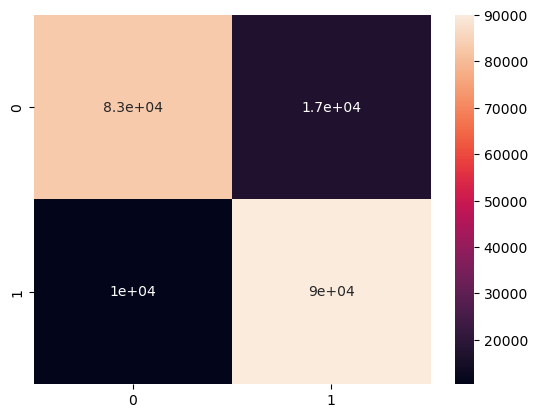

In [24]:
cm = confusion_matrix(y,y_pred)
print("Confusion matrix\n")
sns.heatmap(cm, annot=True)

**Model Building - Logistic Regression**  

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
# Train Logistic Regression
model.fit(X_train,y_train)

LogisticRegression()

**Model Evaluation - Logistic Regression**

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [28]:
#Train Accuracy
X_train_predict = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print("Train accuracy: ", training_data_accuracy)

Train accuracy:  0.5683935765275826


In [29]:
# Test Accuracy
y_pred = model.predict(X_test)
y=y_test
print("Test Accuracy:",accuracy_score(y, y_pred))

Test Accuracy: 0.5685705741626794


In [30]:
from sklearn.metrics import confusion_matrix,classification_report
print("\n Classification report\n")
print(classification_report(y,y_pred))


 Classification report

              precision    recall  f1-score   support

           0       0.56      0.66      0.60    100136
           1       0.58      0.48      0.53    100504

    accuracy                           0.57    200640
   macro avg       0.57      0.57      0.57    200640
weighted avg       0.57      0.57      0.57    200640



Confusion matrix



<AxesSubplot:>

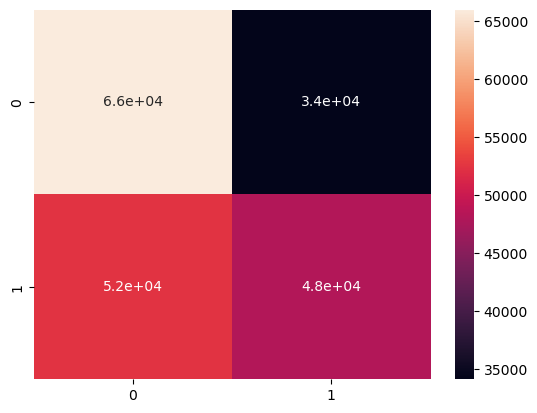

In [31]:
cm = confusion_matrix(y,y_pred)
print("Confusion matrix\n")
sns.heatmap(cm, annot=True)

**Model Building - XGBoost**  

In [32]:
import xgboost
from xgboost import XGBClassifier
model = XGBClassifier()

In [33]:
# Train XGBoost
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

**Model Evaluation - XGBoost**

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [35]:
#Train Accuracy
X_train_predict = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print("Train accuracy: ", training_data_accuracy)

Train accuracy:  0.8447041383464556


In [36]:
# Test Accuracy
y_pred = model.predict(X_test)
y=y_test
print("Test Accuracy:",accuracy_score(y, y_pred))

Test Accuracy: 0.8423295454545454


In [37]:
from sklearn.metrics import confusion_matrix,classification_report
print("\n Classification report\n")
print(classification_report(y,y_pred))


 Classification report

              precision    recall  f1-score   support

           0       0.88      0.80      0.83    100136
           1       0.81      0.89      0.85    100504

    accuracy                           0.84    200640
   macro avg       0.85      0.84      0.84    200640
weighted avg       0.85      0.84      0.84    200640



Confusion matrix



<AxesSubplot:>

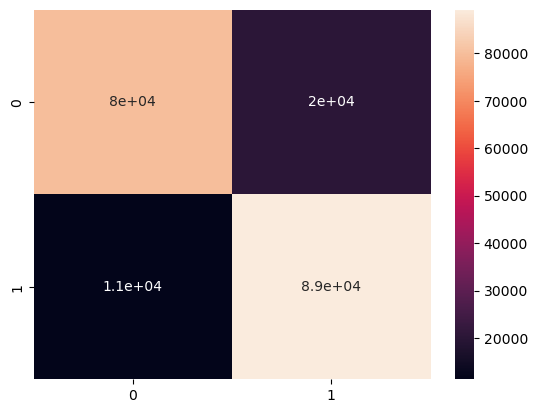

In [38]:
cm = confusion_matrix(y,y_pred)
print("Confusion matrix\n")
sns.heatmap(cm, annot=True)